<a href="https://colab.research.google.com/github/subhajit1560/Blogs/blob/main/FireDucks_vs_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fireducks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


In [ ]:
# download the dataset:

import urllib.request
s3_path = "https://modin-datasets.s3.amazonaws.com/testing/yellow_tripdata_2015-01.csv"
urllib.request.urlretrieve(s3_path, "taxi.csv")

('taxi.csv', <http.client.HTTPMessage at 0x7bacfcfebf10>)

# FireDucks

In [ ]:
import fireducks.pandas as pd
import time

In [ ]:
start = time.time()

df = pd.read_csv("taxi.csv")

big_df = pd.concat([df for _ in range(20)])

df = df.drop(columns = ["congestion_surcharge", "airport_fee"])

new_df = df.sort_values(by = "fare_amount").reset_index(drop=True)

t1 = big_df.groupby("PULocationID").mta_tax.mean().reset_index()
t2 = big_df.groupby("PULocationID").tip_amount.mean().reset_index()
t3 = big_df.groupby("PULocationID").tolls_amount.mean().reset_index()
t4 = big_df.groupby("PULocationID").trip_distance.mean().reset_index()


t5 = big_df.groupby("DOLocationID").mta_tax.mean().reset_index()
t6 = big_df.groupby("DOLocationID").tip_amount.mean().reset_index()
t7 = big_df.groupby("DOLocationID").tolls_amount.mean().reset_index()
t8 = big_df.groupby("DOLocationID").trip_distance.mean().reset_index()

a = (t1._evaluate(), t2._evaluate(), t3._evaluate(), t4._evaluate(),
     t5._evaluate(), t6._evaluate(), t7._evaluate(), t8._evaluate())

print(f"FireDucks run-time = {round(time.time()-start, 4)} seconds")

FireDucks run-time = 9.9916 seconds


# Pandas

Restart the session and run Pandas code

In [ ]:
import pandas as pd
import time

In [ ]:
start = time.time()

df = pd.read_csv("taxi.csv")

big_df = pd.concat([df for _ in range(20)])

df = df.drop(columns = ["congestion_surcharge", "airport_fee"])

new_df = df.sort_values(by = "fare_amount").reset_index(drop=True)

t1 = big_df.groupby("PULocationID").mta_tax.mean().reset_index()
t2 = big_df.groupby("PULocationID").tip_amount.mean().reset_index()
t3 = big_df.groupby("PULocationID").tolls_amount.mean().reset_index()
t4 = big_df.groupby("PULocationID").trip_distance.mean().reset_index()


t5 = big_df.groupby("DOLocationID").mta_tax.mean().reset_index()
t6 = big_df.groupby("DOLocationID").tip_amount.mean().reset_index()
t7 = big_df.groupby("DOLocationID").tolls_amount.mean().reset_index()
t8 = big_df.groupby("DOLocationID").trip_distance.mean().reset_index()

a = (t1, t2, t3, t4,
     t5, t6, t7, t8)

print(f"Pandas run-time = {round(time.time()-start, 4)} seconds")

Pandas run-time = 17.6019 seconds


Creating a DataFrame

In [ ]:
import pandas as pd
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
df_pandas = pd.DataFrame(data)

In [ ]:
import fireducks.pandas as fpd #or import fireducks as fd
import pandas as pd #used to create pandas dataframe first
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
df_pandas = pd.DataFrame(data)
df_fireducks = fpd.DataFrame(df_pandas) # Converting from a Pandas DataFrame
#OR
#data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
#df_fireducks = fd.DataFrame(data)

Reading a CSV File

In [ ]:
import pandas as pd
df_pandas = pd.read_csv('taxi.csv')

In [ ]:
import fireducks.pandas as fpd # or import fireducks as fd
df_fireducks = fpd.read_csv('taxi.csv')

Grouping and Aggregation

In [ ]:
import pandas as pd
data = {'group_col': ['A', 'A', 'B', 'B', 'A'], 'value_col': [1, 2, 3, 4, 5]}
df_pandas = pd.DataFrame(data)
result_pandas = df_pandas.groupby('group_col')['value_col'].sum()

In [ ]:
import fireducks.pandas as fpd # or import fireducks as fd
import pandas as pd
data = {'group_col': ['A', 'A', 'B', 'B', 'A'], 'value_col': [1, 2, 3, 4, 5]}
df_pandas = pd.DataFrame(data)
df_fireducks = fpd.DataFrame(df_pandas)
result_fireducks = df_fireducks.groupby('group_col')['value_col'].sum()

Performance Comparison

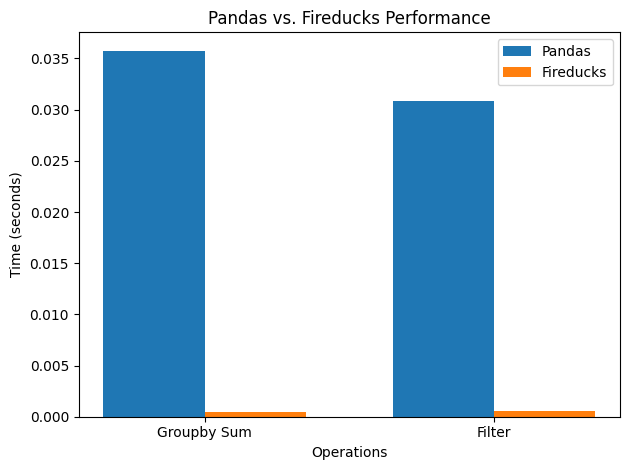

In [ ]:
import pandas as pd
import fireducks.pandas as fpd
import numpy as np
import time
import matplotlib.pyplot as plt

# 1. Generate Sample Data
num_rows = 1000000  # Adjust for dataset size
data = {
    'A': np.random.randint(1, 100, num_rows),
    'B': np.random.rand(num_rows),
    'C': np.random.choice(['X', 'Y', 'Z'], num_rows)
}
df_pandas = pd.DataFrame(data)
df_fireducks = fpd.DataFrame(df_pandas)

# 2. Define Operations to Benchmark
def groupby_sum(df, column1, column2):
    return df.groupby(column1)[column2].sum()

def simple_filter(df, column, value):
    return df[df[column] > value]

# Add more functions as necessary
operations = {
    "Groupby Sum": (groupby_sum, ('A', 'B')),
    "Filter": (simple_filter, ('B', 0.5)),
    # "Join": (join_operation, ('df1', 'df2', 'key_column')),  # Example, define a join operation
}
# 3. Benchmark the operations
pandas_times = []
fireducks_times = []

for op_name, (operation, columns) in operations.items():
    # Pandas
    start_time = time.time()
    operation(df_pandas, *columns)
    pandas_time = time.time() - start_time
    pandas_times.append(pandas_time)

    # Fireducks
    start_time = time.time()
    operation(df_fireducks, *columns)
    fireducks_time = time.time() - start_time
    fireducks_times.append(fireducks_time)

# 4. Plotting the Results
op_names = list(operations.keys()) # Get the names of the operations
x = np.arange(len(op_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pandas_times, width, label='Pandas')
rects2 = ax.bar(x + width/2, fireducks_times, width, label='Fireducks')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Operations')
ax.set_ylabel('Time (seconds)')
ax.set_title('Pandas vs. Fireducks Performance')
ax.set_xticks(x)
ax.set_xticklabels(op_names)
ax.legend()

fig.tight_layout()
plt.show()
